In [1]:
library('tidyverse')
library('moderndive')
library('skimr')

Warning message:
“Your system is mis-configured: ‘/var/db/timezone/localtime’ is not a symlink”
Warning message:
“‘/var/db/timezone/localtime’ is not identical to any known timezone file”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
glimpse(evals)

Rows: 463
Columns: 14
$ ID           <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17…
$ prof_ID      <int> 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, …
$ score        <dbl> 4.7, 4.1, 3.9, 4.8, 4.6, 4.3, 2.8, 4.1, 3.4, 4.5, 3.8, 4.…
$ age          <int> 36, 36, 36, 36, 59, 59, 59, 51, 51, 40, 40, 40, 40, 40, 4…
$ bty_avg      <dbl> 5.000, 5.000, 5.000, 5.000, 3.000, 3.000, 3.000, 3.333, 3…
$ gender       <fct> female, female, female, female, male, male, male, male, m…
$ ethnicity    <fct> minority, minority, minority, minority, not minority, not…
$ language     <fct> english, english, english, english, english, english, eng…
$ rank         <fct> tenure track, tenure track, tenure track, tenure track, t…
$ pic_outfit   <fct> not formal, not formal, not formal, not formal, not forma…
$ pic_color    <fct> color, color, color, color, color, color, color, color, c…
$ cls_did_eval <int> 24, 86, 76, 77, 17, 35, 39, 55, 111, 40, 24, 24, 17, 14, …
$ cls_students <in

In [4]:
evals_ch5 <- evals |> select(ID, score, bty_avg, age, gender)
glimpse(evals_ch5)

Rows: 463
Columns: 5
$ ID      <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,…
$ score   <dbl> 4.7, 4.1, 3.9, 4.8, 4.6, 4.3, 2.8, 4.1, 3.4, 4.5, 3.8, 4.5, 4.…
$ bty_avg <dbl> 5.000, 5.000, 5.000, 5.000, 3.000, 3.000, 3.000, 3.333, 3.333,…
$ age     <int> 36, 36, 36, 36, 59, 59, 59, 51, 51, 40, 40, 40, 40, 40, 40, 40…
$ gender  <fct> female, female, female, female, male, male, male, male, male, …


In [5]:
evals_ch5 |> sample_n(5)

ID,score,bty_avg,age,gender
<int>,<dbl>,<dbl>,<int>,<fct>
231,4.0,6.500,49,male
431,4.5,5.833,33,male
37,4.5,4.000,51,female
35,3.5,4.167,33,female
457,4.6,6.833,32,male


In [6]:
evals_ch5 |> summarize(mean_score = mean(score), med_score = median(score), mean_btyavg = mean(bty_avg), med_btyavg = median(bty_avg))

mean_score,med_score,mean_btyavg,med_btyavg
<dbl>,<dbl>,<dbl>,<dbl>
4.17473,4.3,4.417844,4.333


In [12]:
skim_ch501 <- evals_ch5 |> select(score, bty_avg) |> skim()
skim_ch501

── Data Summary ────────────────────────
                           Values                      
Name                       select(evals_ch5, score, ...
Number of rows             463                         
Number of columns          2                           
_______________________                                
Column type frequency:                                 
  numeric                  2                           
________________________                               
Group variables            None                        

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable n_missing complete_rate mean    sd   p0  p25  p50 p75 p100 hist 
1 score                 0             1 4.17 0.544 2.3  3.8  4.3  4.6 5    ▁▁▅▇▇
2 bty_avg               0             1 4.42 1.53  1.67 3.17 4.33 5.5 8.17 ▃▇▇▃▂


ERROR: Error in is.null(text_repr) || nchar(text_repr) == 0L: 'length = 12' in coercion to 'logical(1)'


In [13]:
skim_ch502 <- evals_ch5 |> select(score, bty_avg, gender) |> skim()
skim_ch502

── Data Summary ────────────────────────
                           Values                      
Name                       select(evals_ch5, score, ...
Number of rows             463                         
Number of columns          3                           
_______________________                                
Column type frequency:                                 
  factor                   1                           
  numeric                  2                           
________________________                               
Group variables            None                        

── Variable type: factor ───────────────────────────────────────────────────────
  skim_variable n_missing complete_rate ordered n_unique top_counts        
1 gender                0             1 FALSE          2 mal: 268, fem: 195

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable n_missing complete_rate mean    sd   p0  p25  p50 p75 p100 hist 
1 

ERROR: Error in is.null(text_repr) || nchar(text_repr) == 0L: 'length = 15' in coercion to 'logical(1)'


# Correlation

In [14]:
evals_ch5 |> get_correlation(formula = score ~ bty_avg)

cor
<dbl>
0.1871424


In [16]:
evals_ch5 |> summarize(correlation = cor(score, bty_avg))

correlation
<dbl>
0.1871424


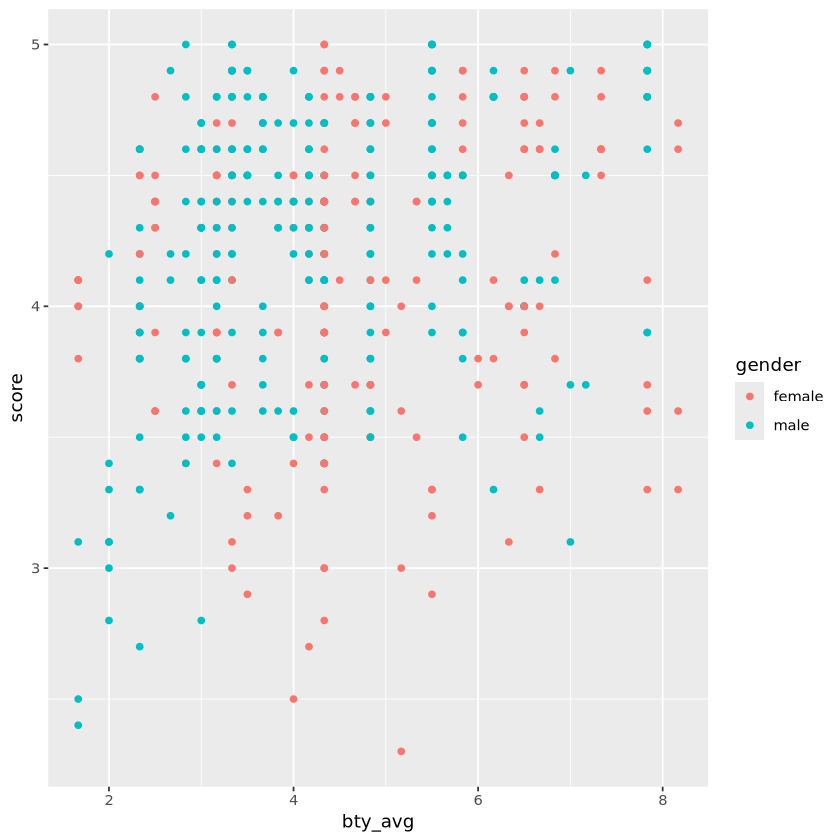

In [20]:
ggplot(evals_ch5, aes(x = bty_avg, y = score, color = gender)) +
    geom_point()

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


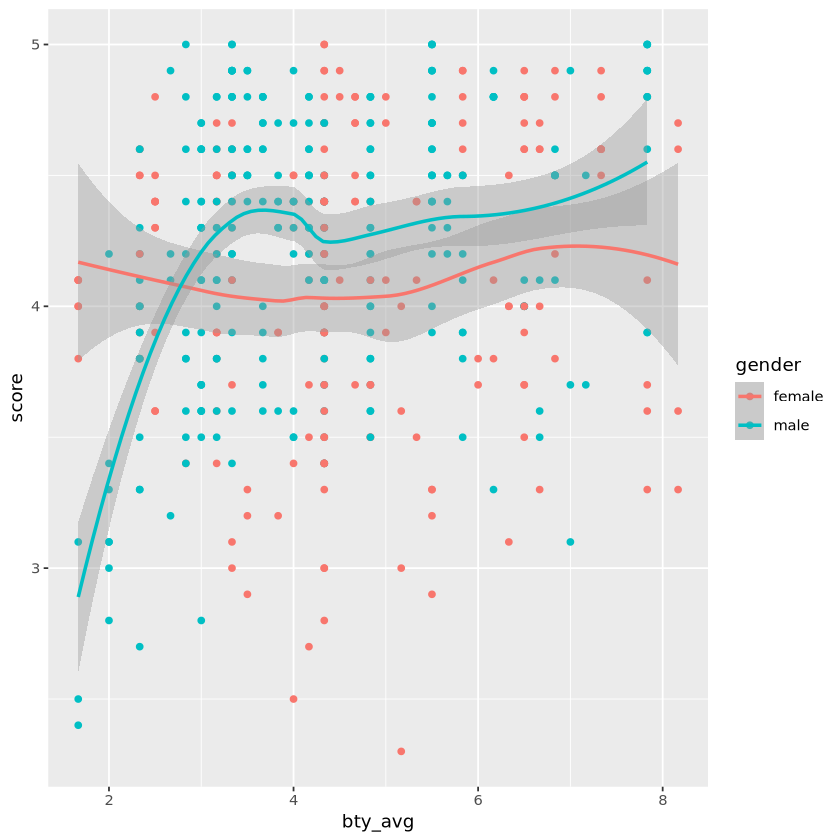

In [21]:
ggplot(evals_ch5, aes(x = bty_avg, y = score, color = gender)) +
    geom_point() + geom_smooth()

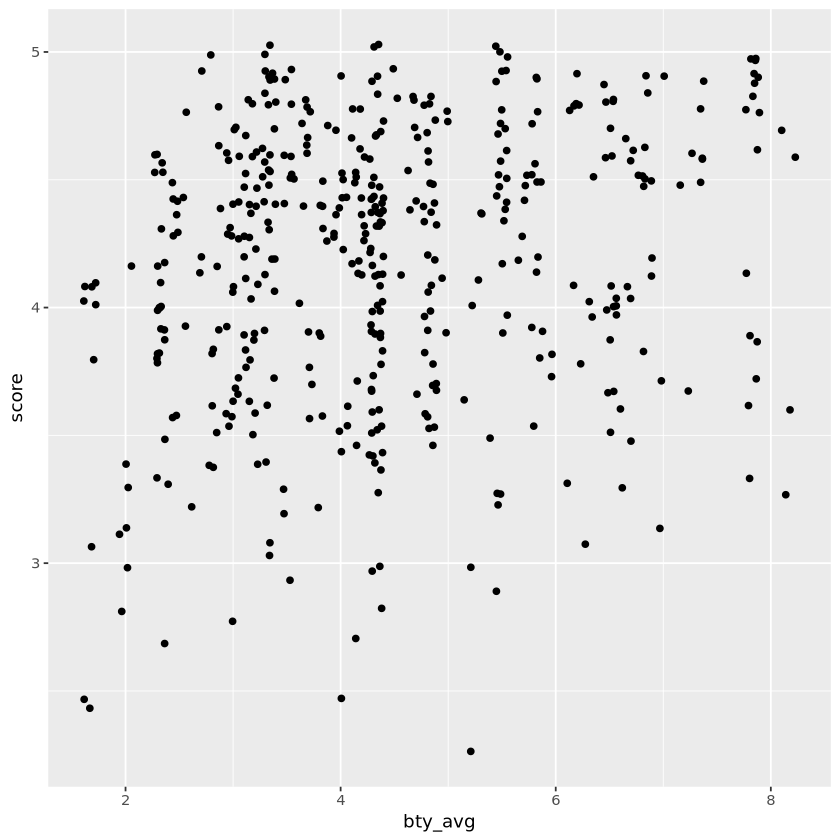

In [29]:
ggplot(evals_ch5, aes(x = bty_avg, y = score)) + geom_jitter()